In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
with np.load('cifar4-train.npz', allow_pickle=False) as npz_file:
    cifar = dict(npz_file.items())

In [7]:
for name in cifar['names']:
    

dict_keys(['pixels', 'overfeat', 'labels', 'names', 'allow_pickle'])

In [12]:
from collections import Counter

count = Counter(cifar['labels']).items()
percentage = {x:int(float(y)/len(cifar['labels'])* 100) for x,y in count}

In [23]:
for label,per in percentage.items():
    print('{} is appearing {}% of the time'.format(label,per))

0 is appearing 25% of the time
1 is appearing 25% of the time
2 is appearing 25% of the time
3 is appearing 25% of the time


In [101]:
#setting baseline with most frequent
from sklearn.model_selection import train_test_split

x_tr,x_te,y_tr,y_te = train_test_split(cifar['overfeat'],cifar['labels'],stratify =cifar['labels'], test_size = 1000)

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent')

dummy.fit(x_tr,y_tr)

dummy.score(x_te,y_te)

0.25

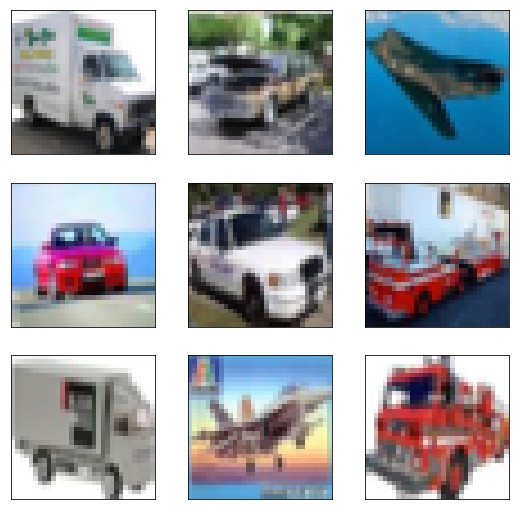

In [49]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))

for i, axis in enumerate(axes.flatten()):
    img = cifar['pixels'][i].reshape(32,32,3)
    axis.imshow(img)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    
plt.show()

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(n_components=None)

pca.fit(cifar['overfeat'])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [58]:
pve = pca.explained_variance_ratio_

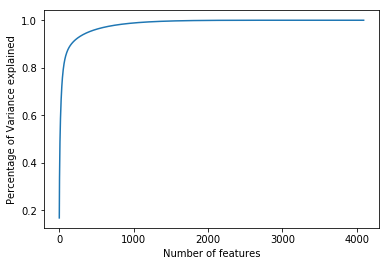

In [61]:
pve_cumsum = np.cumsum(pve)
plt.plot(pve_cumsum)

plt.xlabel('Number of features')
plt.ylabel('Percentage of Variance explained')
plt.show()


In [62]:
# pve of the first 2 features
pve[0]+pve[1]

0.249756

In [68]:
pve_thr = 0
i=0
# find how many features we need to have 80%
while pve_thr < 0.8:
    pve_thr = pve_thr + pve[i]
    i = i+1
print('we need {} features for {} accuracy'.format(i,pve_thr))

# find how many features we need to have 90%
while pve_thr < 0.9:
    pve_thr = pve_thr + pve[i]
    i = i+1
print('we need {} features for {} accuracy'.format(i,pve_thr))

# find how many features we need to have 95%
while pve_thr < 0.95:
    pve_thr = pve_thr + pve[i]
    i = i+1
print('we need {} features for {} accuracy'.format(i,pve_thr))

# find how many features we need to have 99%
while pve_thr < 0.99:
    pve_thr = pve_thr + pve[i]
    i = i+1
print('we need {} features for {} accuracy'.format(i,pve_thr))

we need 58 features for 0.802266797516495 accuracy
we need 164 features for 0.9002715589303989 accuracy
we need 392 features for 0.9500572861143155 accuracy
we need 1058 features for 0.9900161090390611 accuracy


In [78]:
pca1 = PCA(n_components=2)

overfeatpca = pca1.fit_transform(cifar['overfeat'])

pca2 = PCA(n_components=2)
pixelspca = pca2.fit_transform(cifar['pixels'])


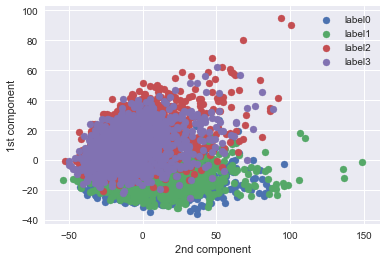

In [91]:
sns.set()
for label in range(0,4):
    idx = (cifar['labels'] == label)
    
    plt.scatter(overfeatpca[idx,0],overfeatpca[idx,1], label = "label{}".format(label))
    
plt.legend()
plt.ylabel('1st component')
plt.xlabel('2nd component')
plt.show()

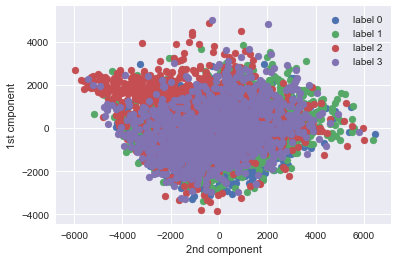

In [92]:
sns.set()
for num in range(0,4):
    idx = (cifar['labels'] == num)
    
    plt.scatter(pixelspca[idx,0],pixelspca[idx,1],label = 'label {}'.format(num))
plt.legend()
plt.ylabel('1st cmponent')
plt.xlabel('2nd component')
plt.show()